<a href="https://colab.research.google.com/github/YeonKang/Python-for-Machine-Learning/blob/main/Lec3_7_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830232, 34.078246209259355)

In [5]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830232, -34.078246209259355)

In [6]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.00324774, 0.00210547, 0.00093269, 0.00087953, 0.00084162,
        0.00086451, 0.00095868, 0.00084138, 0.00082207, 0.00090384]),
 'score_time': array([0.00179577, 0.00077915, 0.00075173, 0.00078344, 0.00073338,
        0.00076437, 0.00073814, 0.00071883, 0.00071502, 0.000741  ]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.51797623890347, -23.941432963658634)

In [8]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [9]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.86283631720998)

In [10]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

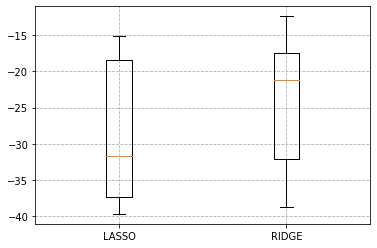

In [11]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [12]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

In [14]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


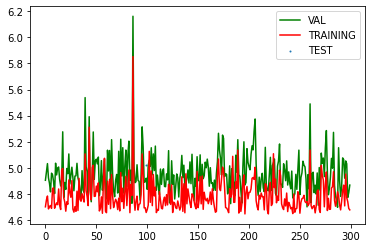

In [15]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [16]:
np.argsort(rmse_val_score)

array([287, 257, 268, 182,  85, 193, 122, 261,  45, 286, 146,  93,  35,
       127,  60, 123, 243,  18, 297, 131,  73,  68, 290, 244, 285, 186,
        53, 227, 209, 112, 278, 250, 266, 153, 179, 245,   9,  42, 226,
        77,  71, 264, 298,  38,   5, 215, 211,  34, 219,  28,  67, 222,
       165, 192, 180, 167,  56, 270, 109, 218,  37,  44,  20, 247, 100,
       241, 259,  59, 279, 214, 137, 233, 118, 291,  64,  80, 117, 161,
       148,  15, 128, 111,  54, 208, 284, 265, 145, 299, 238, 196, 217,
       114, 125, 232, 138,  24, 231, 143, 185, 163,   4, 240, 141,  88,
       164,  19, 197,  97,  33,  98,  89,   8,  92, 151, 289, 236,  83,
        91,   0,  69, 166, 150, 120,  14,  48, 256,  16, 212, 155, 132,
       139, 147, 294,  99,  32,   3, 130,  27, 135, 251, 184, 210,  57,
       280,  46, 176, 274, 191,  29,  75,  30, 156,  25, 110, 173,  11,
       126,   7, 105, 190, 258,  70,  94, 246, 178,  66, 129, 220, 119,
       262, 177,  22, 213,   6, 277, 168, 267, 252, 188,   1, 26

In [17]:
rmse(y_test,sgd_regressor.predict(X_test))

5.019863212807659

In [18]:
rmse(y_test,model_list[217].predict(X_test))

5.264910776397732

In [19]:
model_list[0].coef_

array([-0.99626597,  0.9422438 ,  0.07380921,  0.58271765, -2.23026612,
        3.74512467, -0.06942451, -3.33595169,  1.81793535, -1.54624162,
       -1.97961275,  1.54878094, -3.28652989])